# Pseudo-random number generators


<img src="http://dilbert.com/strip/2001-10-25">
<img src="http://assets.amuniversal.com/321a39e06d6401301d80001dd8b71c47">
<img src=" https://imgs.xkcd.com/comics/random_number.png">

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Pseudo-random number generators

A computer is a deterministic system that executes a series of instructions (program) in a completely predictable fashion.  In the absence of some external source of real randomness (eg. a thermal "noise" diode) we have to settle for a *pseudo-random* number generator that uses a deterministic algorithm to produce a sequence of apparently random values.  All PNRGs consist of some function $f$ that operates on some number $x_i$ to produce a new value $x_{i+1}$

 $$ x_{i+1} = f(x_i;a_1,a_2,\ldots a_n) $$

where $a_n$ are internal parameters specific to each implementation.

A useful class of PRNGs are based on multiplicative linear congruential generators
 $$  x_{i+1} = \left( a x_i + b \right) \;mod\, m$$
which use fast integer multiplication and modulo arithmetic to produce numbers in the range from 1 to $m-1$.

For example

 $$  x_{i+1} = 6 x_i \;mod\, 13 $$

starting with a seed of $1$ produces the sequence

 $$\ldots 1,6,10,8,9,2,12,7,3,5,4,11,1 \ldots$$
 
while starting with a seed of $2$ produces the sequence

 $$\ldots 2,12,7,3,5,4,11,1,6,10,8,9,2 \ldots$$
 
Ideally, the result will be a circular list of some permutation of the integers between $1$ and $m-1$.

The choice for multiplicative factor and modulus is critical, as most values produce non-random sequences.
One good pair of parameters found by Park and Miller

 $$ x_{i+1} = 7^5 x_i \;mod\, (2^{31} - 1) = 16807 x_i \;mod\, 2147483647 $$
 
produces a complete sequence of 32 bit random numbers.

*Note:* state-of-the-art PRNGs may be based on more sophisticated algorithms, but they all produce some kind of circular permuted list.  This is equivalent to drawing cards from a shuffled deck, as the next card is unpredictable but not random.

[https://en.wikipedia.org/wiki/Mersenne_Twister]


The numpy random framework currently uses a Mersenne Twister pseudo-random number generator.  It has a very long period of $2^{19937} − 1$.  The internal state is complex, and can be obtained as follows.

In [2]:
import numpy as np

seed = 123
r = np.random.RandomState(seed)
np.random.RandomState.get_state(r)

('MT19937', array([       123, 3885958024,  930007257,  840982176,  801699108,
        1232403257,  337646878, 1472684765, 3650469076, 3624112092,
         612309509, 1026879748, 3254401696, 3482279260, 1042328969,
        2323761180,  975045094,  304403919,  194847165, 1412920484,
        3016774189, 2155123616, 1919807744, 4267744892, 4201217843,
        4211072521, 1057747980,   27636951, 4194854895, 2355252281,
        4147160677,  604519517, 2182649297, 2561017696, 2669829068,
        2521921129, 1198521179, 4096218279, 3763087578, 3923197636,
         502612907,  279393696,   84592714, 1953931101, 2576948088,
        3245482319, 1592577834, 4235771686,  267466441, 2885365374,
        3680351006, 3533516708, 4162137111, 3648854041, 1626762360,
         613715188, 3098947708, 3678834671, 3310359638,  499942084,
        1996913552, 4205205874,  127255251, 2065549438, 2458194267,
         171407710, 2976395352,  175193541, 2233388029,  676000480,
         632009382, 2850181573, 14175

## A terrible example

https://en.wikipedia.org/wiki/RANDU

RANDU is a linear congruential pseudorandom number generator of the Park–Miller type, which has been used since the 1960s. It is defined by the recurrence:

 $$ V_{j+1} = 65539\cdot V_j\, \bmod\, 2^{31} $$
 
with the initial seed number $V_0$ as an odd number. It generates pseudorandom integers $V_{j}$ which are uniformly distributed in the interval [1, $2^{31}$ − 1], but in practical applications are often mapped into pseudorandom rationals $X_j$ in the interval (0, 1), by the formula:

 $$ X_j = \frac{V_{j}}{2^{31}} $$
 
IBM's RANDU is widely considered to be one of the most ill-conceived random number generators ever designed.

The reason for choosing these particular values is that with a 32-bit-integer word size, the arithmetic of mod $2^{31}$ and 65539 (i.e., $2^{16}+3$) calculations could be done quickly, using special features of some computer hardware.

In [3]:
def prng_randu( nsamples=2, seed=13, multval=65539, modval=2**31, scale=True):
    
    sequence = np.zeros( nsamples, dtype=np.int32 )
    sequence[0] = seed
    
    for i in range(1,nsamples): 
        sequence[i] = multval*sequence[i-1] % modval
        
    if scale:
        sequence = sequence / np.double(modval)
        
    return sequence

print( prng_randu(9 , scale=False))

[        13     852007    5111925   23003487   92013597  345050199
 1242178821   52653839 2021215533]


Text(0.5, 1.0, 'Does this look random?')

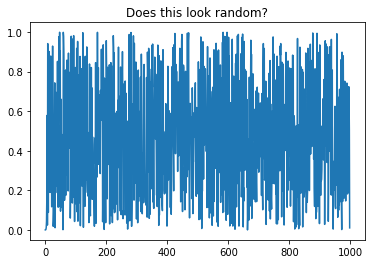

In [4]:
#V = [13] ; modt=2**31  ;  nn=500000
#for i in range(nn-1): V.append( 65539*V[-1] % modt )
#x = np.array(V) / 2.0**31
x = prng_randu(500000)
plt.plot(x[0:999])
display( plt.title('Does this look random?') )

Text(0.5, 1.0, '2-dimensional lag plot')

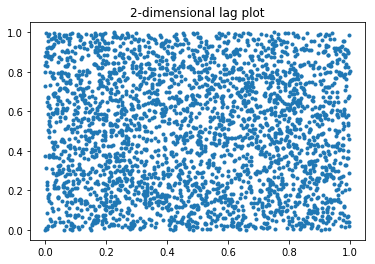

In [5]:
# If successive numbers were not actually independent then we might 
# expect to see some patterns emerging when we plot one sample as 
# x and the next sample as y.
#
xx, yy = x[0:6000].reshape(-1,2).T
plt.plot( xx,yy, '.')
plt.title('2-dimensional lag plot')
#
# Humans are very good at detecting patterns, even when there 
# isn't actually anything there.  However, I would say that 
# there is structure in this plot.  A quantitative analysis 
# might be done using the joint probability.

<img src="http://ircamera.as.arizona.edu/NatSci102/NatSci102/images/sloanbutterfly.jpg">

Text(0.5, 1.0, '2-dimensional lag plot')

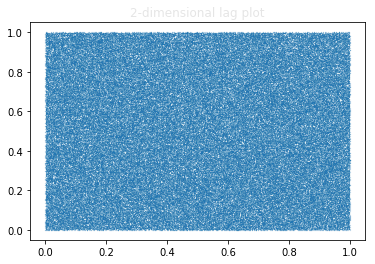

In [6]:
# Tried plotting more points, but that didn't help.
#
xx, yy = x.reshape(-1,2).T
plt.plot( xx,yy, '.', ms=0.2)
plt.title('2-dimensional lag plot', alpha=0.1)

Text(0.5, 0.92, 'hyperplanes')

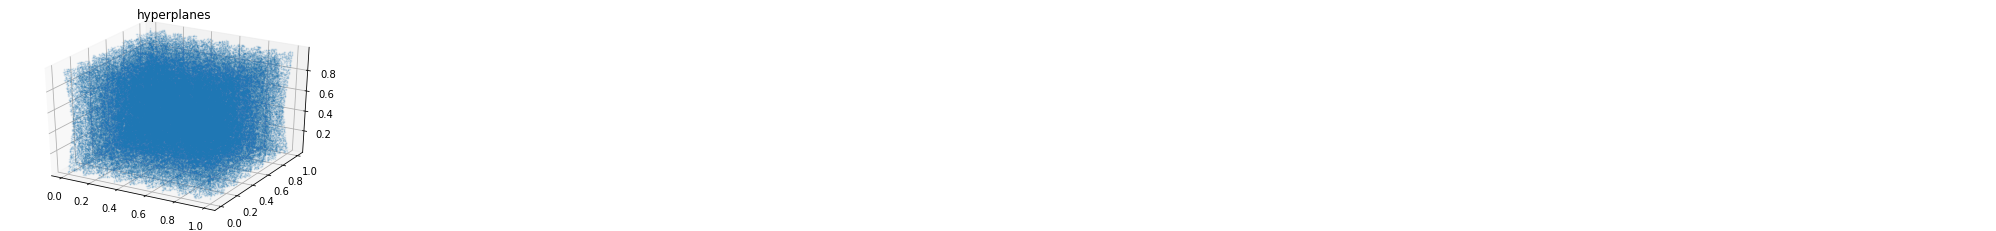

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nn = 500000
#xx, yy, zz = x[0:6000].reshape(3,-1)
xx, yy, zz = x[0:nn-3:3], x[1:nn-2:3], x[2:nn-1:3]

plt.plot( xx,yy,zz, '.', ms=1.5, alpha=0.1)
plt.title('hyperplanes')

Text(0.5, 1.0, 'slice for z>0.9')

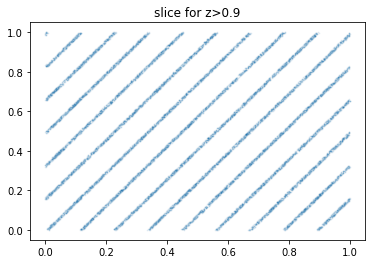

In [8]:
plt.plot( xx[zz>0.9], yy[zz>0.9], '.', ms=1.5, alpha=0.1)
plt.title('slice for z>0.9')

Extending this approach to three dimensions turns out to be very informative.  Rather than being uniformly distributed around the volume, it turns out that all of the points occur on a small number of planes.  This will drastically reduce the randomness, as knowing one value will let us make predictions about others.

### Optional: try changing the PRNG parameters and see what happens to the hyperplanes.

## Entropy estimation

In [9]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
#import numpy as np

def symbol_entropy(datalist):
    '''Estimate the Shannon entropy for a sequence of symbols.
    '''
    
    hist = {}
    for item in datalist:
        if item not in hist:
            hist[item] = 1
        else: 
            hist[item] += 1
            
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )

    return entropy

### Limited sample limitations

We can use `numpy.random.randint` to generate a sequence of $N$ random integers between 0 and $2^d$.  From this we can construct a histogram, estimate the probability distribution, and calculate the entropy.

If we actually do this for $d=31$ and $N=1,000,000$ then we may be surprised to obtain an entropy of just under 20 bits rather than 31.  This occurs because we are not adequately sampling the complete set of outcomes.  If $N<<2^d$ then most of the histogram bins will have zero counts, approximately $N$ will have one count, and a very few will have two or more.  This is effectively the same as a uniform distribution with $N$ bins

 $$2^{19.93} = 1,000,000$$

which will have an entropy of almost 20 bits.

The obvious solution to this problem is to increase the number of samples until we can ensure good statistics in all bins.  However, this may be difficult for very large $d$.


In [10]:
V = np.random.randint(low=0, high=2**31, 
                      size=1_000_000, dtype=np.int32)
entropy = symbol_entropy( V )
print( entropy, 2**entropy )

19.931126569324213 999693.6758730386


An alternative strategy is to break large numbers down into smaller components.  For example, we might have doubts about the sampling of rare words in Spamlet, but should be relatively confident in the distribution of letters.

The fundamental elements of binary numbers are bits, but we will leave them for optional questions.

Here we will explore the randomness of a 32-bit integer sequence by breaking each value down into four 8-bit "bytes".  If the 32-bit sequence is completely random, then each of the four byte sequences should also be random.

In [11]:
def int32_to_bytes( value ):
    ''' Break down a 32-bit integer into four 8-bit bytes'''
    dt1 = np.dtype(('i4', [('bytes','u1',4)]))
    return np.array(value).view(dtype=dt1)['bytes']

sequence = np.int32([0, 1, 2, 255, 256, 1024])
elements = int32_to_bytes(sequence)
for i in range(len(sequence)):
    print( sequence[i], '\t', elements[i,:])

0 	 [0 0 0 0]
1 	 [1 0 0 0]
2 	 [2 0 0 0]
255 	 [255   0   0   0]
256 	 [0 1 0 0]
1024 	 [0 4 0 0]


### randint is random

Test the numpy `randint` function on bytes and get the expected value of 31-bits of entropy per 31-bit "word".

In [12]:
V = np.random.randint(
    low=0, high=2**31, size=1_000_000, dtype=np.int32)   

b4 = int32_to_bytes(V)

for i in [0,1,2,3]:
    sent = symbol_entropy( b4[:,i] )
    print(sent)


7.999814410978283
7.999814295237033
7.999796607416781
6.999908447887705


### randu is not

The classic `randu` function gives approximately 20-bits of entropy per 31-bit word when analyzed this way.  Note: this should be considered as a best-case upper-bound. It is entirely possible that some other way of analyzing the output of `randu` might give an even lower number.

In [13]:
V = prng_randu(1_000_000)
b4 = int32_to_bytes(V)

for i in [0,1,2,3]:
    sent = symbol_entropy( b4[:,i] )
    print(sent)

4.981398088860908
4.981047614907483
4.971310752625228
4.796529804923541


In [14]:
# q) what happens if we look at differences between sucessive samples?
#
# a) the 3rd bytes are slightly less random and 
#    the 4th bytes are significantly more random
#
V = prng_randu(500000)
V = V[1:] - V[0:-1]
b4 = int32_to_bytes(V)
#b4 = b4[1:,:] - b4[0:-1,:]
#b4 = b4[:,1:] - b4[:,0:-1]
for i in range(b4.shape[1]):
    sent = symbol_entropy( b4[:,i] )
    print(sent)

4.975778208633038
4.981437431456746
4.596261054661544
5.463596406933021


## Bitwise (optional)

The paper by Park & Miller mentions a classic PRNG that was commonly used by UNIX operating systems, and claims that "the low bits of the numbers generated are not very random".
We can test this claim by defining a function as given in equation 14.

In [15]:
def unix_rand(seed=None):
    
    unix_rand.seed = unix_rand.seed if seed is None else seed
    if unix_rand.seed is None:
        unix_rand.seed = 0
    
    multval, addval, maxval = 1103515245, 12345, 2**31
    unix_rand.seed = (multval * unix_rand.seed + addval) % maxval
    
    return unix_rand.seed

print( unix_rand(0) )
print( unix_rand() )
print( unix_rand() )

12345
1406932606
654583775


## Optional: random bits?

Write a function that takes an integer sequence and determines whether a specific bit is set for each value  ie.

function call:

     isbitset( sequence=[0,2,1,4,7], setbit=1 )
     

result: 

     [False, True, False, False, True]
     
Use this function to examine the output from the unix_rand generator.  Then examine the output from the numpy.random generator.  Compare and discuss.     

Carry out a quantitative analysis using "mutual information".

In [16]:
import numpy as np

# generate a short sequence of pseudo-random numbers
#
z = [unix_rand(seed=0)]
for i in range(5):
    z.append(unix_rand() )

# turn the list into a numpy array
#
z = np.array(z)    

In [17]:
setbit = 4
bitmask = 2**setbit
print('setbit=', setbit, 'bitmask=', bitmask)

# look at the sequence
print('\n', z )

# "mask" the bit with a binary "and"
print('\n', z & bitmask )

# is the bit set?  (True or False)
print('\n', (z & bitmask) != 0)

# is the bit set?  (1 or 0)
print('\n',  (z & bitmask) // bitmask)

setbit= 4 bitmask= 16

 [     12345 1406932606  654583775 1449466924  229283573 1109335178]

 [16 16 16  0 16  0]

 [ True  True  True False  True False]

 [1 1 1 0 1 0]
